# For our mini-project, we plan to analyse how the local Big Mac prices of various countries are affected by the Purchasing Power Parity (PPP), the average gold price in their country and inflation rate as well as the year and country.

## First, we will import the necessary datasets that we need and clean them

#### Import various necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sb.set() 

#### Read Big Mac data from bigmac.csv

In [2]:
Macdata = pd.read_csv('bigmac.csv')
Macdata.head()

date iso_a3 currency_code         name  local_price  dollar_ex  \
0  2000-04-01    ARG           ARS    Argentina         2.50       1.00   
1  2000-04-01    AUS           AUD    Australia         2.59       1.68   
2  2000-04-01    BRA           BRL       Brazil         2.95       1.79   
3  2000-04-01    CAN           CAD       Canada         2.85       1.47   
4  2000-04-01    CHE           CHF  Switzerland         5.90       1.70   

   dollar_price  USD_raw  EUR_raw  GBP_raw  JPY_raw  CNY_raw  GDP_dollar  \
0      2.500000 -0.00398  0.05007 -0.16722 -0.09864  1.09091         NaN   
1      1.541667 -0.38579 -0.35246 -0.48645 -0.44416  0.28939         NaN   
2      1.648045 -0.34341 -0.30778 -0.45102 -0.40581  0.37836         NaN   
3      1.938776 -0.22758 -0.18566 -0.35417 -0.30099  0.62152         NaN   
4      3.470588  0.38270  0.45774  0.15609  0.25130  1.90267         NaN   

   adj_price  USD_adjusted  EUR_adjusted  GBP_adjusted  JPY_adjusted  \
0        NaN           NaN           NaN           NaN           NaN   
1        NaN           NaN           NaN           NaN           NaN   
2        NaN           NaN           NaN           NaN           NaN   
3        NaN           NaN           NaN           NaN           NaN   
4        NaN           NaN           NaN           NaN           NaN   

   CNY_adjusted  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

#### Convert the Big Mac data into a dataframe, extracting the date, country name, exchange rate to US dollar, local price of Big Mac in local price and local price of Big Mac in USD

In [3]:
Mac = pd.DataFrame(Macdata[["date", "name", "dollar_ex", "local_price","dollar_price"]])
Mac.head()

date         name  dollar_ex  local_price  dollar_price
0  2000-04-01    Argentina       1.00         2.50      2.500000
1  2000-04-01    Australia       1.68         2.59      1.541667
2  2000-04-01       Brazil       1.79         2.95      1.648045
3  2000-04-01       Canada       1.47         2.85      1.938776
4  2000-04-01  Switzerland       1.70         5.90      3.470588

#### Reformating the "date" column to Year

In [4]:
from datetime import datetime

# Define a function to extract the year
def extract_year(date_string):
    date_object = datetime.strptime(date_string, '%Y-%m-%d')
    return date_object.year

# Apply the function to the date column
Mac['Year'] = Mac['date'].apply(lambda x: extract_year(x))

# Drop the original date column if needed
Mac.drop(columns=['date'], inplace=True)
Mac.head()

name  dollar_ex  local_price  dollar_price  Year
0    Argentina       1.00         2.50      2.500000  2000
1    Australia       1.68         2.59      1.541667  2000
2       Brazil       1.79         2.95      1.648045  2000
3       Canada       1.47         2.85      1.938776  2000
4  Switzerland       1.70         5.90      3.470588  2000

#### Read gold price data from gold_price_yearly.csv

In [5]:
Golddata = pd.read_csv('gold_price_yearly.csv')
Golddata.head()

Year  Average Closing Price  Year Open  Year High  Year Low  \
0  1969                  41.10      41.80      43.75     35.00   
1  1970                  35.96      35.13      39.19     34.78   
2  1971                  40.80      37.33      43.90     37.33   
3  1972                  58.17      43.73      70.00     43.73   
4  1973                  97.12      64.99     127.00     64.10   

   Year Range Price  Year Close  Annual % Change  
0              8.75       35.21           -0.161  
1              4.41       37.38            0.062  
2              6.57       43.50            0.164  
3             26.27       64.70            0.487  
4             62.90      112.25            0.735

#### Convert the gold data into a dataframe, extracting the year, average closing price and annual percentage change

In [6]:
Gold = pd.DataFrame(Golddata[["Year", "Average Closing Price", "Annual % Change"]])
Gold.head()

Year  Average Closing Price  Annual % Change
0  1969                  41.10           -0.161
1  1970                  35.96            0.062
2  1971                  40.80            0.164
3  1972                  58.17            0.487
4  1973                  97.12            0.735

#### Merge the Gold(goldprice) dataset and Mac(big mac) dataset together

In [7]:
# Merge datasets on the 'Year' column
merged_df = pd.merge(Mac, Gold, on='Year', how='inner')

# Drop rows with extra years
Year = set(Mac['Year']).intersection(set(Gold['Year']))
merged_df = merged_df[merged_df['Year'].isin(Year)]

merged_df.head()

name  dollar_ex  local_price  dollar_price  Year  \
0    Argentina       1.00         2.50      2.500000  2000   
1    Australia       1.68         2.59      1.541667  2000   
2       Brazil       1.79         2.95      1.648045  2000   
3       Canada       1.47         2.85      1.938776  2000   
4  Switzerland       1.70         5.90      3.470588  2000   

   Average Closing Price  Annual % Change  
0                 279.29           -0.063  
1                 279.29           -0.063  
2                 279.29           -0.063  
3                 279.29           -0.063  
4                 279.29           -0.063

#### Rename the columns, move "Year" column in front

In [8]:
new_column_names = {
    'name': 'Country',
    'dollar_ex': 'Exchange Rate',
    'local_price': 'Local Price',
    'dollar_price': 'Local Price in USD',
    'Average Closing Price': 'Average Gold Price',
    'Annual % Change': 'Annual % Change_Gold'
}
merged_df.rename(columns=new_column_names, inplace=True)

year_column = merged_df.pop("Year")
# Insert the "Year" column at the beginning of the DataFrame
merged_df.insert(0, "Year", year_column)

merged_df.head()

Year      Country  Exchange Rate  Local Price  Local Price in USD  \
0  2000    Argentina           1.00         2.50            2.500000   
1  2000    Australia           1.68         2.59            1.541667   
2  2000       Brazil           1.79         2.95            1.648045   
3  2000       Canada           1.47         2.85            1.938776   
4  2000  Switzerland           1.70         5.90            3.470588   

   Average Gold Price  Annual % Change_Gold  
0              279.29                -0.063  
1              279.29                -0.063  
2              279.29                -0.063  
3              279.29                -0.063  
4              279.29                -0.063

#### Check duplicates in the dataset ---- there are repeated datas of the same country in the same year, as shown below by checking the Local Price of US in big mac dataset  

In [9]:
USprice = merged_df[merged_df['Country'] == 'United States'].set_index('Year')['Local Price']
print(USprice)

Year
2000    2.510000
2001    2.540000
2002    2.490000
2003    2.710000
2004    2.900000
2005    3.060000
2006    3.150000
2006    3.100000
2007    3.220000
2007    3.410000
2008    3.570000
2009    3.570000
2010    3.580000
2010    3.733333
2011    4.065000
2012    4.197220
2012    4.327500
2013    4.367396
2013    4.556667
2014    4.624167
2014    4.795000
2015    4.790000
2015    4.790000
2016    4.930000
2016    5.040000
2017    5.060000
2017    5.300000
2018    5.280000
2018    5.510000
2019    5.580000
2019    5.740000
2020    5.670000
2020    5.710000
Name: Local Price, dtype: float64


#### Remove the duplicate data

In [10]:
# Remove duplicate rows based on 'Year' and 'Country'
cleaned_data = merged_df.drop_duplicates(subset=['Year', 'Country'])

# Reset index to avoid a hierarchical index
cleaned_data.reset_index(drop=True, inplace=True)

#the values with the same year and country is removed, so now each year, each country only has one value.
USprice = cleaned_data[cleaned_data['Country'] == 'United States'].set_index('Year')['Local Price']
print(USprice)

Year
2000    2.510000
2001    2.540000
2002    2.490000
2003    2.710000
2004    2.900000
2005    3.060000
2006    3.150000
2007    3.220000
2008    3.570000
2009    3.570000
2010    3.580000
2011    4.065000
2012    4.197220
2013    4.367396
2014    4.624167
2015    4.790000
2016    4.930000
2017    5.060000
2018    5.280000
2019    5.580000
2020    5.670000
Name: Local Price, dtype: float64


#### Convert cleaned_data dataframe to result_df dataframe

In [11]:
result_df = pd.DataFrame(cleaned_data)

#### Read the PPP data from OECD_PPP.csv

In [12]:
PPPData = pd.read_csv('OECD_PPP.csv', encoding='unicode_escape')
PPPData.head()

Year    Country  PPP Value
0  2000    Albania     42.017
1  2000  Argentina      0.664
2  2000  Australia      1.312
3  2000    Austria      0.908
4  2000    Belgium      0.900

#### Convert PPP data to a dataframe

In [13]:
PPP_df = pd.DataFrame(PPPData)
PPP_df.head()

Year    Country  PPP Value
0  2000    Albania     42.017
1  2000  Argentina      0.664
2  2000  Australia      1.312
3  2000    Austria      0.908
4  2000    Belgium      0.900

#### Merge result_df with PPP_df on 'Year' and 'Country' columns

In [14]:
combined_df = pd.merge(result_df, PPP_df, on=['Year', 'Country'], how='left')
combined_df.head()

Year      Country  Exchange Rate  Local Price  Local Price in USD  \
0  2000    Argentina           1.00         2.50            2.500000   
1  2000    Australia           1.68         2.59            1.541667   
2  2000       Brazil           1.79         2.95            1.648045   
3  2000       Canada           1.47         2.85            1.938776   
4  2000  Switzerland           1.70         5.90            3.470588   

   Average Gold Price  Annual % Change_Gold  PPP Value  
0              279.29                -0.063      0.664  
1              279.29                -0.063      1.312  
2              279.29                -0.063      0.758  
3              279.29                -0.063      1.228  
4              279.29                -0.063      1.789

#### Drop null values from PPP Value column

In [15]:
combined_df.dropna(subset=['PPP Value'], inplace=True)
combined_df.tail()

Year        Country  Exchange Rate  Local Price  Local Price in USD  \
856  2020   Saudi Arabia        3.75180        13.00            3.465003   
857  2020      Singapore        1.34715         5.90            4.379616   
858  2020         Sweden        9.45910        51.50            5.444493   
864  2020  United States        1.00000         5.67            5.670000   
866  2020   South Africa       14.39100        31.00            2.154124   

     Average Gold Price  Annual % Change_Gold  PPP Value  
856             1773.73                 0.244      1.618  
857             1773.73                 0.244      0.844  
858             1773.73                 0.244      8.436  
864             1773.73                 0.244      1.000  
866             1773.73                 0.244      6.969

#### Read inflation data from globalinflation.csv

In [16]:
globalinflation_df = pd.read_csv('globalinflation.csv')
globalinflation_df.head()

country_name                                   indicator_name  1980  1981  \
0  Afghanistan  Annual average inflation (consumer prices) rate  13.4  22.2   
1      Albania  Annual average inflation (consumer prices) rate   NaN   NaN   
2      Algeria  Annual average inflation (consumer prices) rate   9.7  14.6   
3      Andorra  Annual average inflation (consumer prices) rate   NaN   NaN   
4       Angola  Annual average inflation (consumer prices) rate  46.7   1.4   

   1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  2019  \
0  18.2  15.9  20.4   8.7  -2.1  18.4  ... -0.66   4.38   4.98   0.63   2.3   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.90   1.30   2.00   2.00   1.4   
2   6.6   7.8   6.3  10.4  14.0   5.9  ...  4.80   6.40   5.60   4.30   2.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  ... -1.10  -0.40   2.60   1.00   0.5   
4   1.8   1.8   1.8   1.8   1.8   1.8  ...  9.20  30.70  29.80  19.60  17.1   

    2020   2021   2022  2023  2024  
0   5.44   5.06  13.71   9.1   NaN  
1   1.60   2.00   6.70   4.8   4.0  
2   2.40   7.20   9.30   9.0   6.8  
3   0.10   1.70   6.20   5.2   3.5  
4  22.30  25.80  21.40  13.1  22.3  

[5 rows x 47 columns]

#### Reshape inflation dataframe so that it corresponds to our current dataframe

In [17]:
inflation_long_df = pd.melt(globalinflation_df, id_vars=['country_name', 'indicator_name'], var_name='year', value_name='inflation_rate')
inflation_long_df['year'] = pd.to_numeric(inflation_long_df['year'], errors='coerce')
inflation_long_df.head()

country_name                                   indicator_name  year  \
0  Afghanistan  Annual average inflation (consumer prices) rate  1980   
1      Albania  Annual average inflation (consumer prices) rate  1980   
2      Algeria  Annual average inflation (consumer prices) rate  1980   
3      Andorra  Annual average inflation (consumer prices) rate  1980   
4       Angola  Annual average inflation (consumer prices) rate  1980   

   inflation_rate  
0            13.4  
1             NaN  
2             9.7  
3             NaN  
4            46.7

#### Extract the year, country name and inflation rate from the dataframe

In [18]:
inflation_rate_df = inflation_long_df[['year', 'country_name','inflation_rate']]
inflation_rate_df.head()

year country_name  inflation_rate
0  1980  Afghanistan            13.4
1  1980      Albania             NaN
2  1980      Algeria             9.7
3  1980      Andorra             NaN
4  1980       Angola            46.7

#### Extract inflation data from year 2000 to 2020 and rename columns

In [19]:
inflation_df = inflation_rate_df[(inflation_rate_df['year']>=2000)&(inflation_rate_df['year']<=2020)]
inflation_df = inflation_df.rename(columns={'country_name':'Country'})
inflation_df = inflation_df.rename(columns={'year':'Year'})
inflation_df = inflation_df.rename(columns={'inflation_rate' : 'Inflation Rate'})

#### Merge combined_df and inflation dataframe

In [20]:
merged_df = pd.merge(combined_df, inflation_df, how = 'inner', on = ['Year', 'Country'])
merged_df.tail()

Year        Country  Exchange Rate  Local Price  Local Price in USD  \
577  2020   Saudi Arabia        3.75180        13.00            3.465003   
578  2020      Singapore        1.34715         5.90            4.379616   
579  2020         Sweden        9.45910        51.50            5.444493   
580  2020  United States        1.00000         5.67            5.670000   
581  2020   South Africa       14.39100        31.00            2.154124   

     Average Gold Price  Annual % Change_Gold  PPP Value  Inflation Rate  
577             1773.73                 0.244      1.618             3.4  
578             1773.73                 0.244      0.844            -0.2  
579             1773.73                 0.244      8.436             0.7  
580             1773.73                 0.244      1.000             1.3  
581             1773.73                 0.244      6.969             3.3

## Now that we have all the data we need in a dataframe, we will proceed to analyse the variables to determine if they are sufficiently good to be variables

### Using boxplot to check if the Categorical variable, "Country" and the Continuous variable, "Year" are good predictors for Big Mac Prices

### We are using Local Price in USD so that the box plots for each country can be visualised easier, which allows us to make good general judgements just by looking. We will use Local Price after visualising to standardise with the response variable, the local price of a Big Mac

### The "Local Price in USD" against "Country" boxplot shows the distribution of all Big Mac prices from 2000 to 2020 for each of the countries. 

<Axes: xlabel='Country', ylabel='Local Price in USD'>

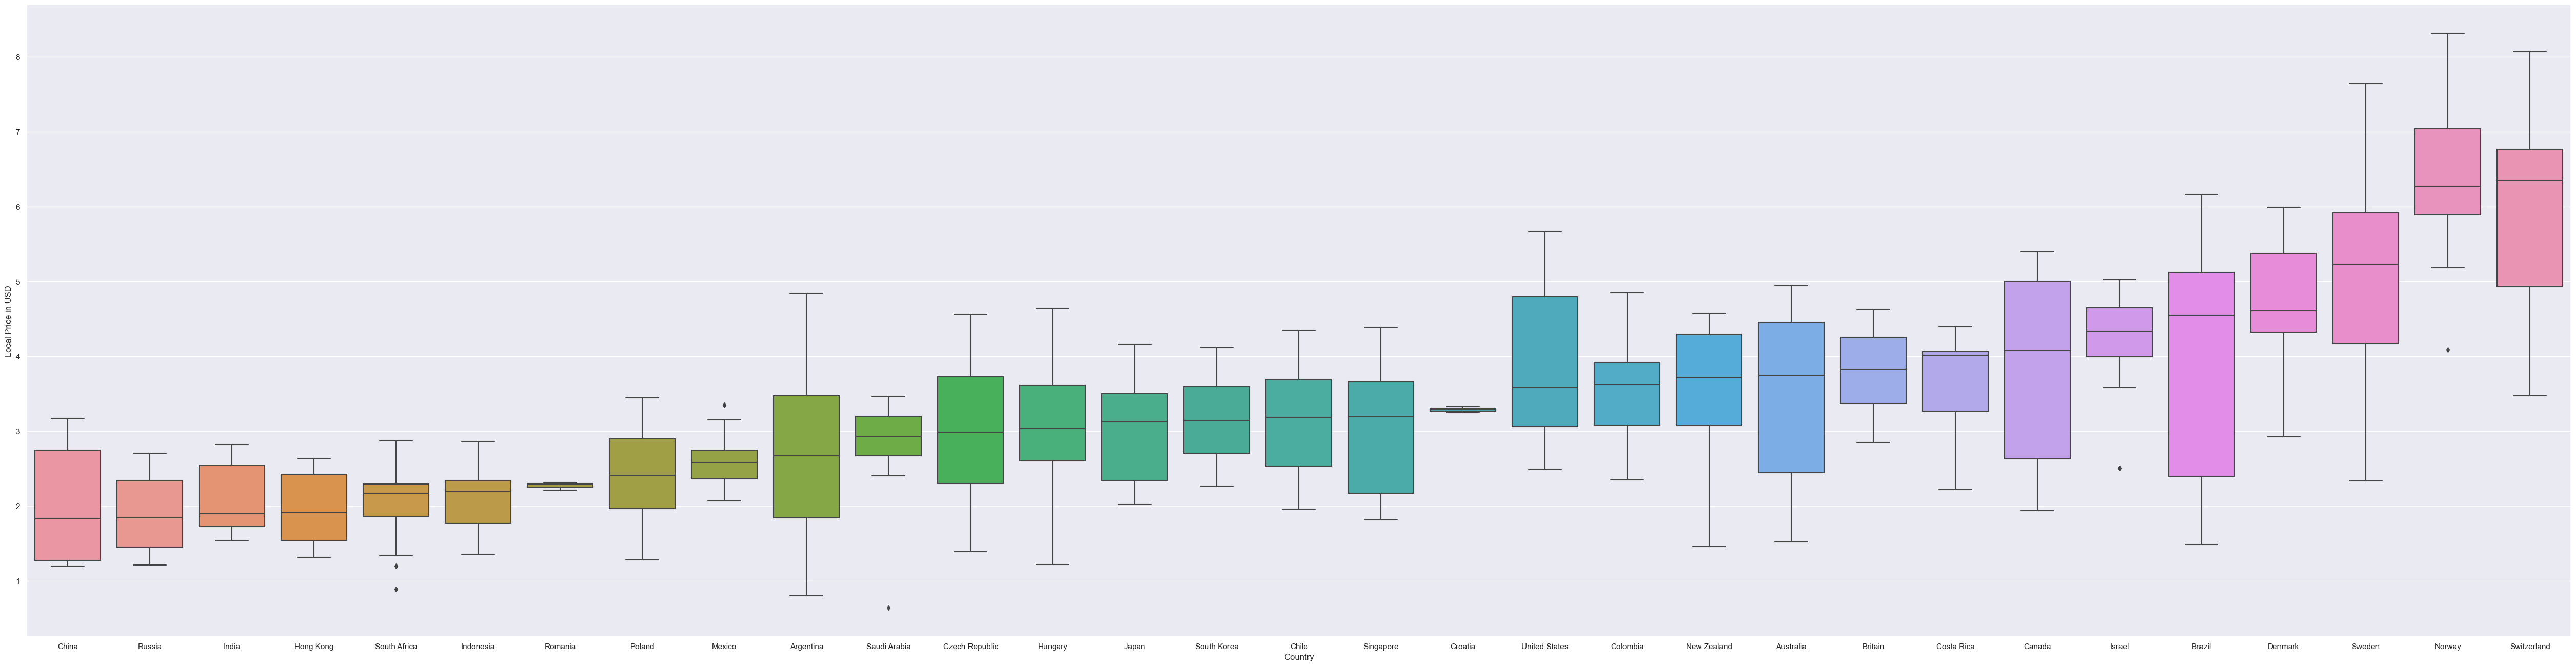

In [21]:
f = plt.figure(figsize=(64,16))
median_prices = merged_df.groupby('Country')['Local Price in USD'].median().sort_values()

# Extract the order of countries sorted by median price in ascending order
countries_ordered = median_prices.index

sb.boxplot(x = "Country", y = "Local Price in USD", data = merged_df, order=countries_ordered)

### Country is a good predictor because Local Price of a Big Mac (in USD) changes significantly for different countries over the years, allowing us to see the relationship between a country and their Big Mac price sufficiently well.

### The "Local Price in USD" against "Year" boxplot show the distribution of the local Big Mac price (in USD) in all the countries for every year from 2000 to 2020. 

<Axes: xlabel='Year', ylabel='Local Price in USD'>

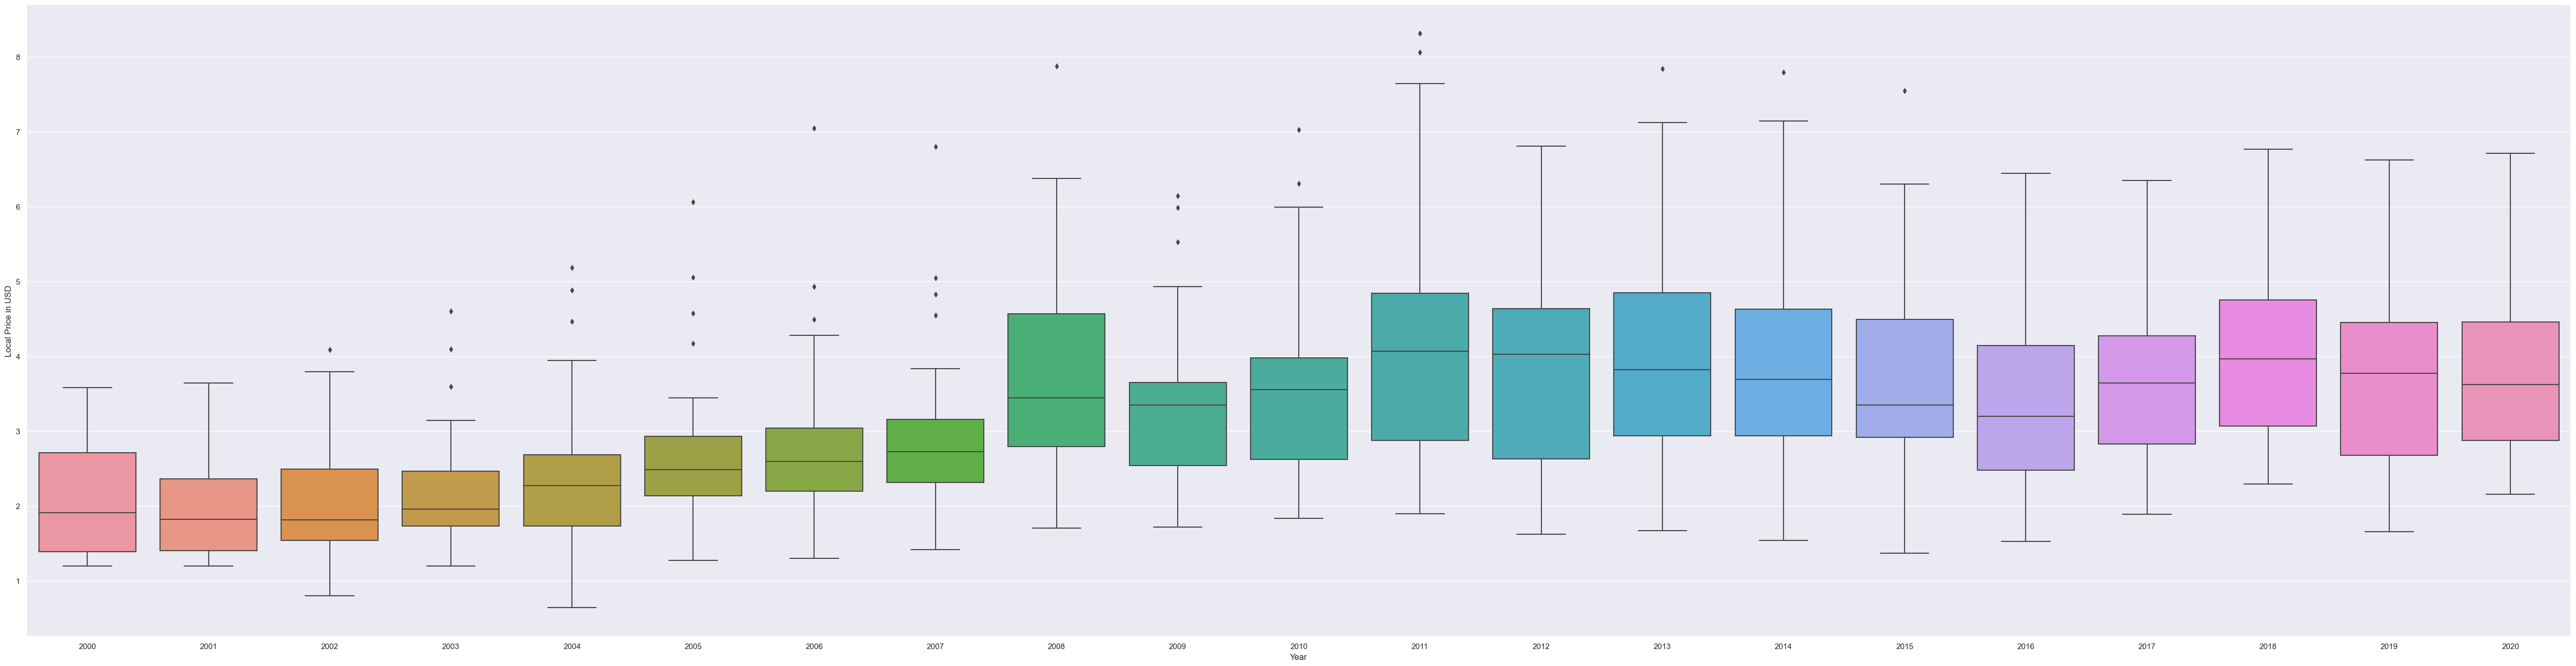

In [22]:
f = plt.figure(figsize=(64,16))
sb.boxplot(x = "Year", y = "Local Price in USD", data = merged_df)

### We can see that generally, there is some variation in the local price (in USD) across different years. Thus, it represents the relationship between local price of a Big Mac (in USD) and the year sufficiently well.

## As such, Country and Year are sufficiently good variables to be used as predictors for Big Mac Prices.

## Now, we will analyse the numeric variables to determine whether they can be good predictors or not

#### Plot a heatmap to visualise correlation between variables

<Axes: >

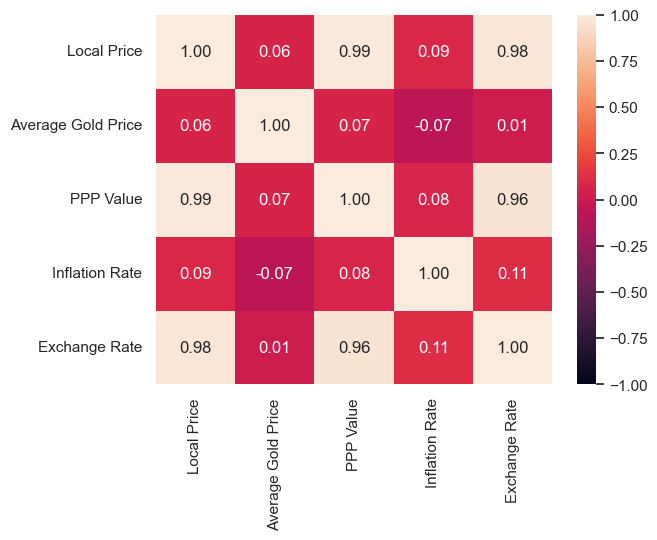

In [23]:
columns_of_interest = ['Local Price', 'Average Gold Price', 'PPP Value', 'Inflation Rate', 'Exchange Rate']
data = merged_df[columns_of_interest]
correlation_matrix = data.corr()
sb.heatmap(correlation_matrix, vmin = -1, vmax = 1, annot=True, fmt = ".2f")

### As we saw here, the correlation of local Big Mac price to PPP is extremely high, while being almost non-existent for the average gold price and inflation rate. We also found that exchange rate has extremely high correlation to local Big Mac price, thus we will use it as well. As such, we will only use PPP, exchange rate, year and country for predicting local Big Mac prices and drop the rest of the irrelevant columns.

#### Drop Average Gold Price, Annual % Change_Gold and Inflation Rate columns

In [24]:
cleaned_df = merged_df.drop(columns=['Average Gold Price', 'Annual % Change_Gold', 'Inflation Rate'])
cleaned_df.head()

Year      Country  Exchange Rate  Local Price  Local Price in USD  \
0  2000    Argentina           1.00         2.50            2.500000   
1  2000    Australia           1.68         2.59            1.541667   
2  2000       Brazil           1.79         2.95            1.648045   
3  2000       Canada           1.47         2.85            1.938776   
4  2000  Switzerland           1.70         5.90            3.470588   

   PPP Value  
0      0.664  
1      1.312  
2      0.758  
3      1.228  
4      1.789

### Make a multi variate linear regression model to determine the goodness of fit of PPP and exchange rate alone, and to determine how much the goodness of fit of final model is affected by "Year" and "Country"

Intercept of Regression 	: b =  [-36.21164101]
Coefficients of Regression 	: a =  [[4.59001844 0.78432245]]

      Predictors  Coefficients
0      PPP Value      4.590018
1  Exchange Rate      0.784322



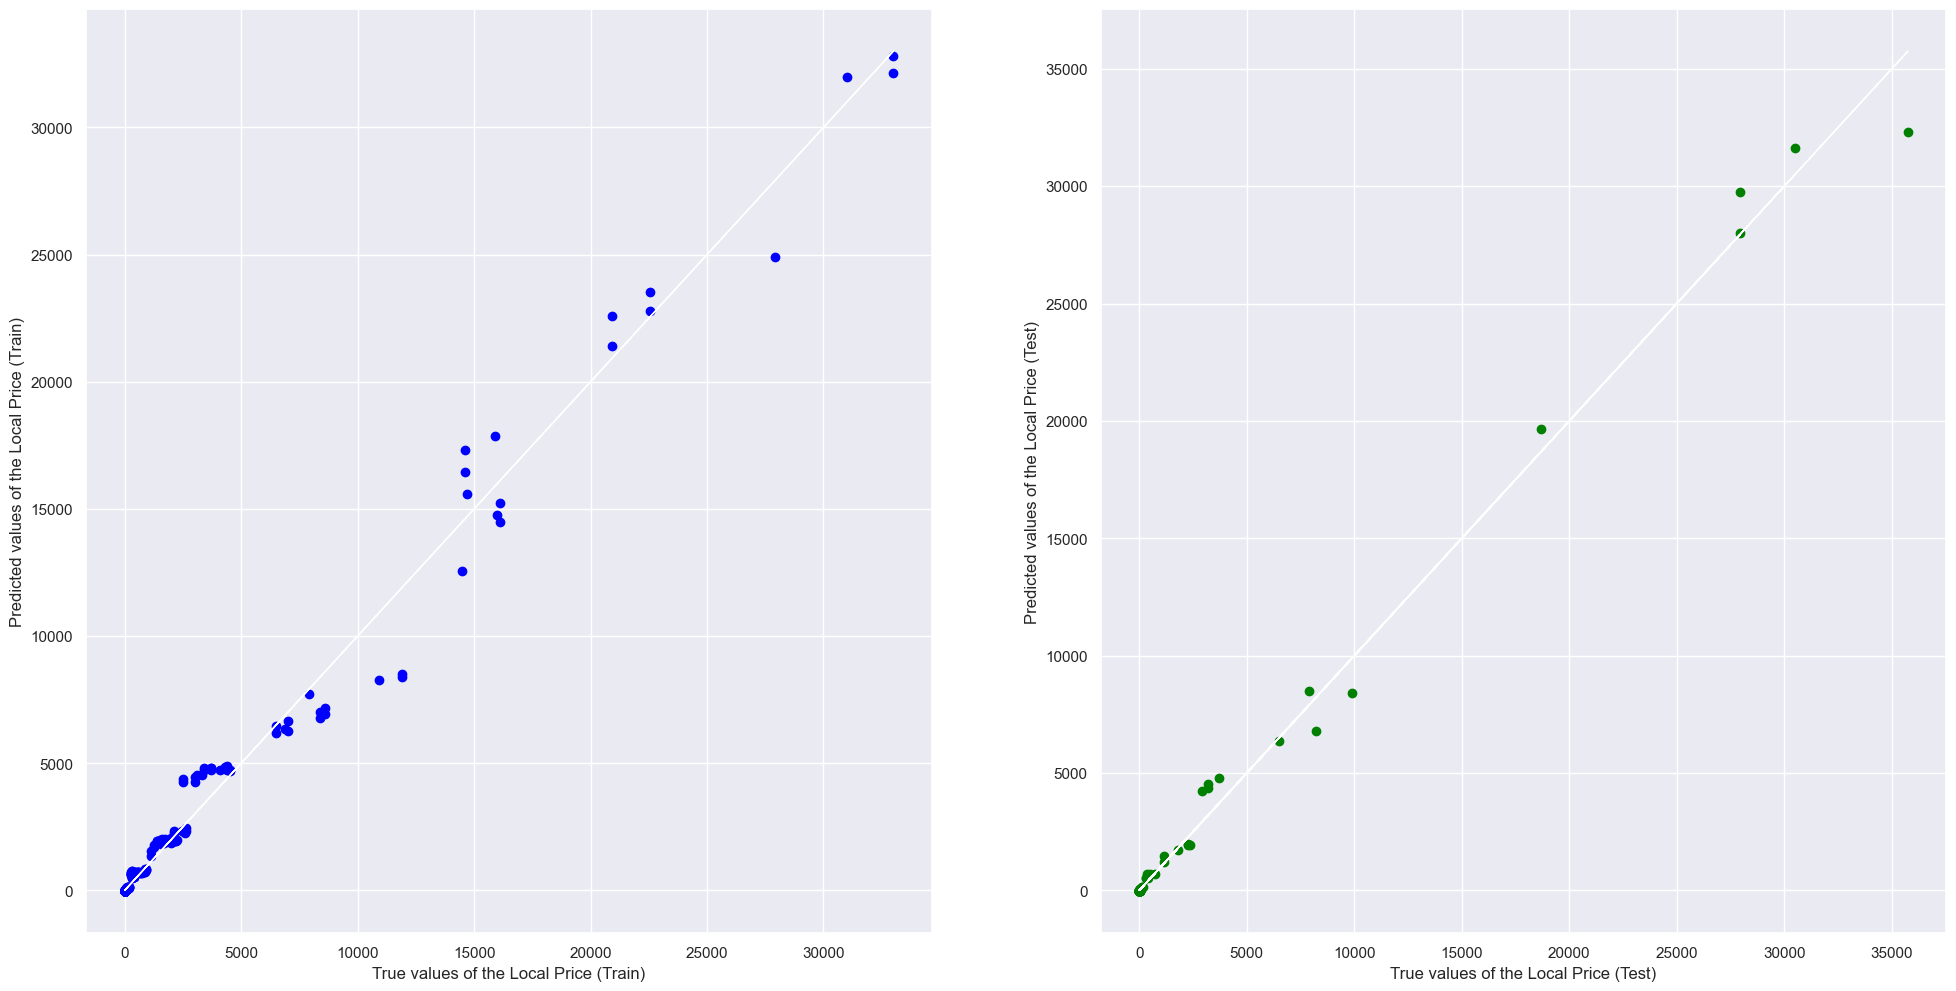

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.986899694869459
Mean Squared Error (MSE) 	: 233158.38797136964

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9929472453569114
Mean Squared Error (MSE) 	: 247532.78788625397



In [25]:
# Extract Response and Predictors
y = pd.DataFrame(cleaned_df["Local Price"])
X = pd.DataFrame(cleaned_df[["PPP Value", "Exchange Rate"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train.values.ravel(), y_train.values.ravel(), 'w-', linewidth=1) # Plotting the ideal line
axes[0].set_xlabel("True values of the Local Price (Train)")
axes[0].set_ylabel("Predicted values of the Local Price (Train)")

axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test.values.ravel(), y_test.values.ravel(), 'w-', linewidth=1) # Plotting the ideal line
axes[1].set_xlabel("True values of the Local Price (Test)")
axes[1].set_ylabel("Predicted values of the Local Price (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### As we can see, the Explained Variance is very high while the Mean Squared Error (MSE) is also high, which means the model is good enough to predict Local Price. However, there is still room for improvement to lower the MSE, so we shall see if including the "Year" and "Country" variables can improve it.

### Using a line chart to examine how Big Mac prices change from 2000 to 2020 in the US. 
#### Zoom in on the US specifically to see how Big Mac prices in the US have changed over the years to determine if there is actually a change in the Big Mac prices or is it just inflation changing each countries' Big Mac prices.

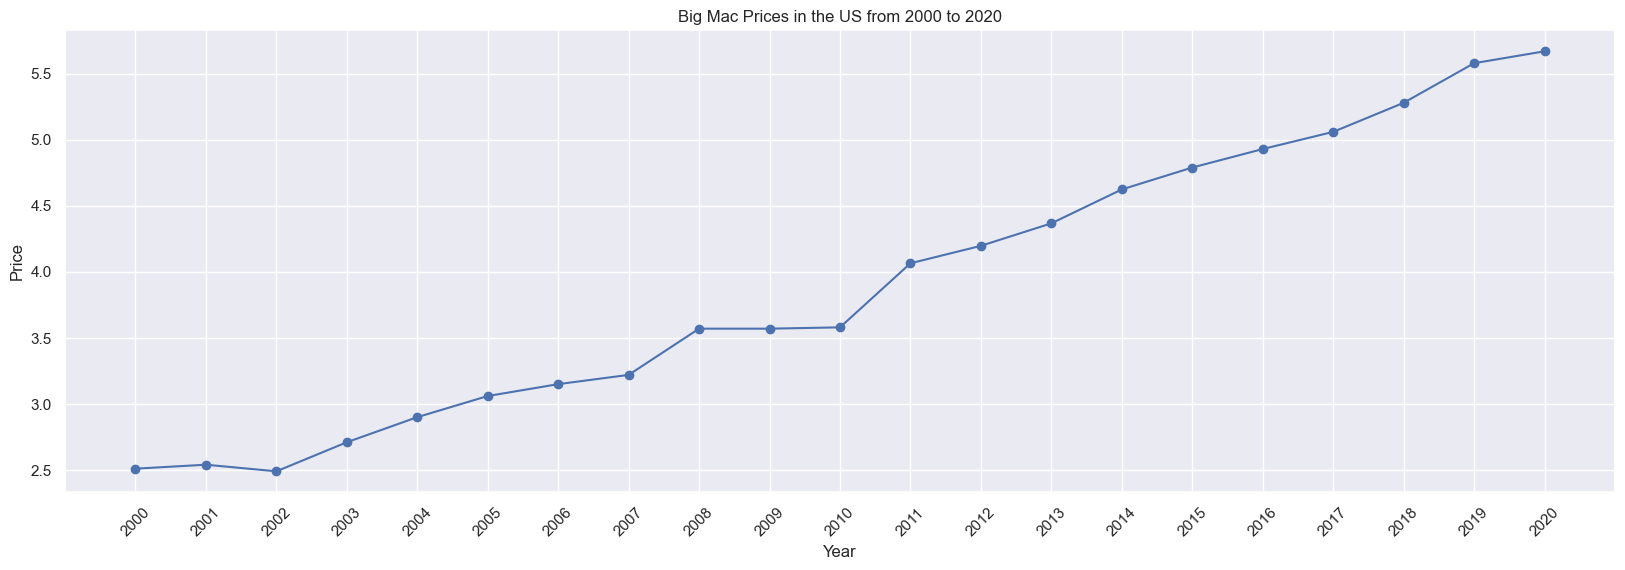

In [26]:
US = merged_df[merged_df['Country'] == 'United States']
plt.figure(figsize=(20, 6))
plt.plot(US['Year'], US['Local Price'], marker='o', linestyle='-')
plt.title('Big Mac Prices in the US from 2000 to 2020')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(US['Year'], rotation=45)
plt.show()

### Thus we can conclude that local Big Mac prices can change over the years and it is a good variable to be used as a reponse.

## We can now start creating a multi variate linear regression model to predict local Big Mac price

#### We will start by setting up a Multi-Variate Linear Regression problem.

### Response Variable : Local Price
### Predictor Feature : Year, Country, Exchange Rate, PPP

### Regression Model : Local Price =  ùëé1 x Year +  ùëé2 √ó Country +  ùëé3 √ó Exchange rate + ùëé4 x PPP +  ùëè

#### Encode Country and Year using one-hot encoding as we want to compare different years and countries as distinct categories. After that, we merge the encoded "Year" and "Country" variables and the remaining associated data as a Pandas DataFrame

In [27]:
reindexed_df = cleaned_df.set_index(['Year', 'Country'])

# Extract Year and Country before encoding to use in merging
X = cleaned_df[['Year', 'Country']]  # Keep these columns separate for merging
y = reindexed_df['Local Price in USD'] 

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Year', 'Country'])

# Include the original Year and Country columns for merging
X_encoded['Year'] = X['Year']
X_encoded['Country'] = X['Country']

# Merge encoded features with original columns
final_df = X_encoded.merge(cleaned_df, on=['Year', 'Country'], how='left')

# Check if the Local Price column and others are properly included
final_df.tail()

# Year_2001, Year_2002, ...: Binary columns representing different years (Year categories)
# Country_Argentina, Country_Australia, ...: Binary columns representing different countries (Country categories)

Year_2000  Year_2001  Year_2002  Year_2003  Year_2004  Year_2005  \
577      False      False      False      False      False      False   
578      False      False      False      False      False      False   
579      False      False      False      False      False      False   
580      False      False      False      False      False      False   
581      False      False      False      False      False      False   

     Year_2006  Year_2007  Year_2008  Year_2009  ...  Country_South Korea  \
577      False      False      False      False  ...                False   
578      False      False      False      False  ...                False   
579      False      False      False      False  ...                False   
580      False      False      False      False  ...                False   
581      False      False      False      False  ...                False   

     Country_Sweden  Country_Switzerland  Country_United States  Year  \
577           False                False                  False  2020   
578           False                False                  False  2020   
579            True                False                  False  2020   
580           False                False                   True  2020   
581           False                False                  False  2020   

           Country  Exchange Rate  Local Price  Local Price in USD  PPP Value  
577   Saudi Arabia        3.75180        13.00            3.465003      1.618  
578      Singapore        1.34715         5.90            4.379616      0.844  
579         Sweden        9.45910        51.50            5.444493      8.436  
580  United States        1.00000         5.67            5.670000      1.000  
581   South Africa       14.39100        31.00            2.154124      6.969  

[5 rows x 58 columns]

### Now we create the multi-variate linear regression model using PPP, Exchange Rate, the various Years and Countries as the predictors and Local Price as the Reponse variable

### Set target variables first PPP, Exchange Rate, the various Years and Countries as the x value and Local Price as the y value

In [28]:
y = final_df['Local Price']
X = final_df.drop(['Year', 'Country', 'Local Price', 'Local Price in USD'], axis=1)

#### Set up the regression problem with Train and Test datasets with a 80:20 random split.

In [29]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the sample sizes
print("Training set size - X_train:", len(X_train))
print("Training set size - y_train:", len(y_train))
print("Testing set size - X_test:", len(X_test))
print("Testing set size - y_test:", len(y_test))

Training set size - X_train: 465
Training set size - y_train: 465
Testing set size - X_test: 117
Testing set size - y_test: 117


#### Perform basic statistical exploration and visualization on the Train Set

In [30]:
# Summary Statistics for Response
y_train.describe()

count      465.000000
mean      1282.032974
std       4649.578284
min          1.880000
25%          6.200000
50%         20.000000
75%         85.000000
max      35750.000000
Name: Local Price, dtype: float64

In [31]:
# Summary Statistics for Predictors
X_train.describe()

Exchange Rate    PPP Value
count     465.000000   465.000000
mean      520.969266   196.495034
std      2038.764271   662.662482
min         0.501040     0.410000
25%         1.710000     1.441000
50%         6.696500     5.296000
75%        44.400000    18.444000
max     14090.000000  4760.509000

### Create the Linear Regression model

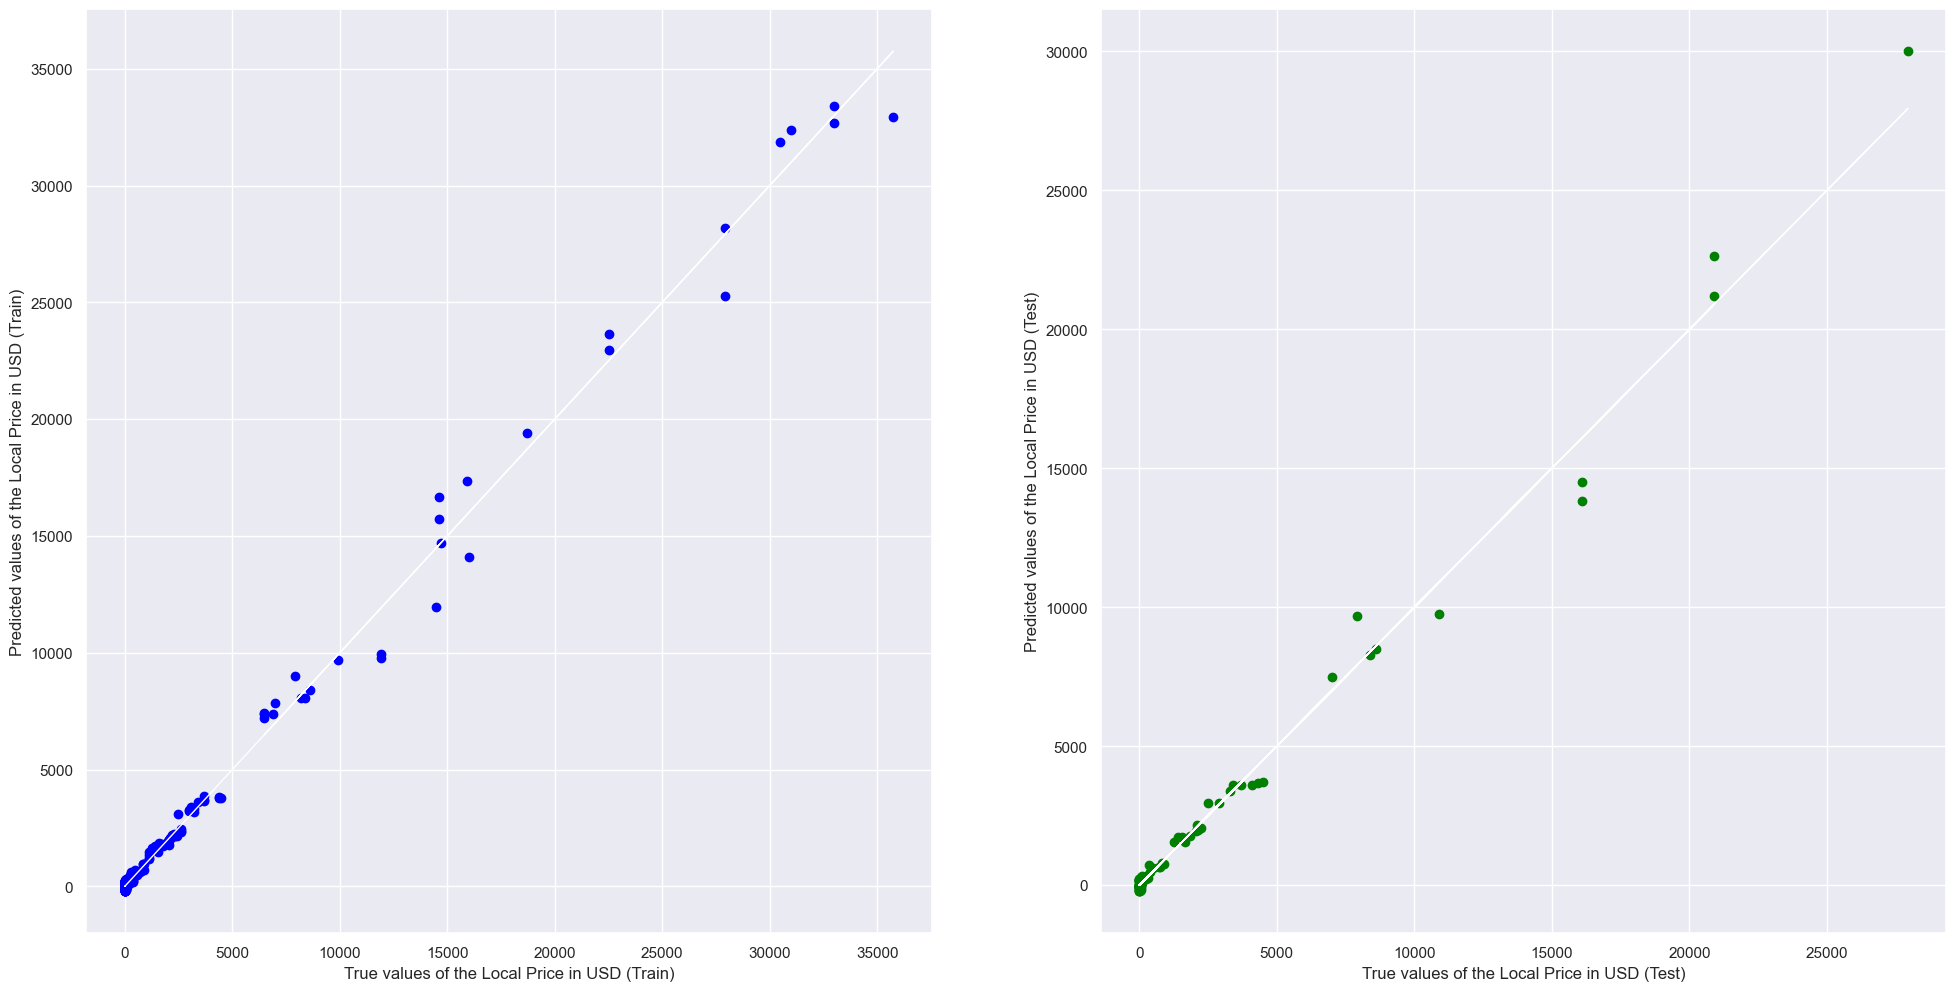

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9941179978505338
Mean Squared Error (MSE) 	: 126887.0600541392
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9902178493414506
Mean Squared Error (MSE) 	: 196812.90440131663


In [32]:
# Linear Regression using Train Data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plotting the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)  # Plotting the ideal line
axes[0].set_xlabel("True values of the Local Price in USD (Train)")
axes[0].set_ylabel("Predicted values of the Local Price in USD (Train)")
axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)  # Plotting the ideal line
axes[1].set_xlabel("True values of the Local Price in USD (Test)")
axes[1].set_ylabel("Predicted values of the Local Price in USD (Test)")
plt.show()

# Evaluating the Goodness of Fit
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

### From the above model, we can see that there is indeed an improvement in both the R^2 and MSE, with the R^2 increasing and MSE decreasing for both the train and test datasets

### We will use a residual plot to assess the goodness-of-fit of the regression model

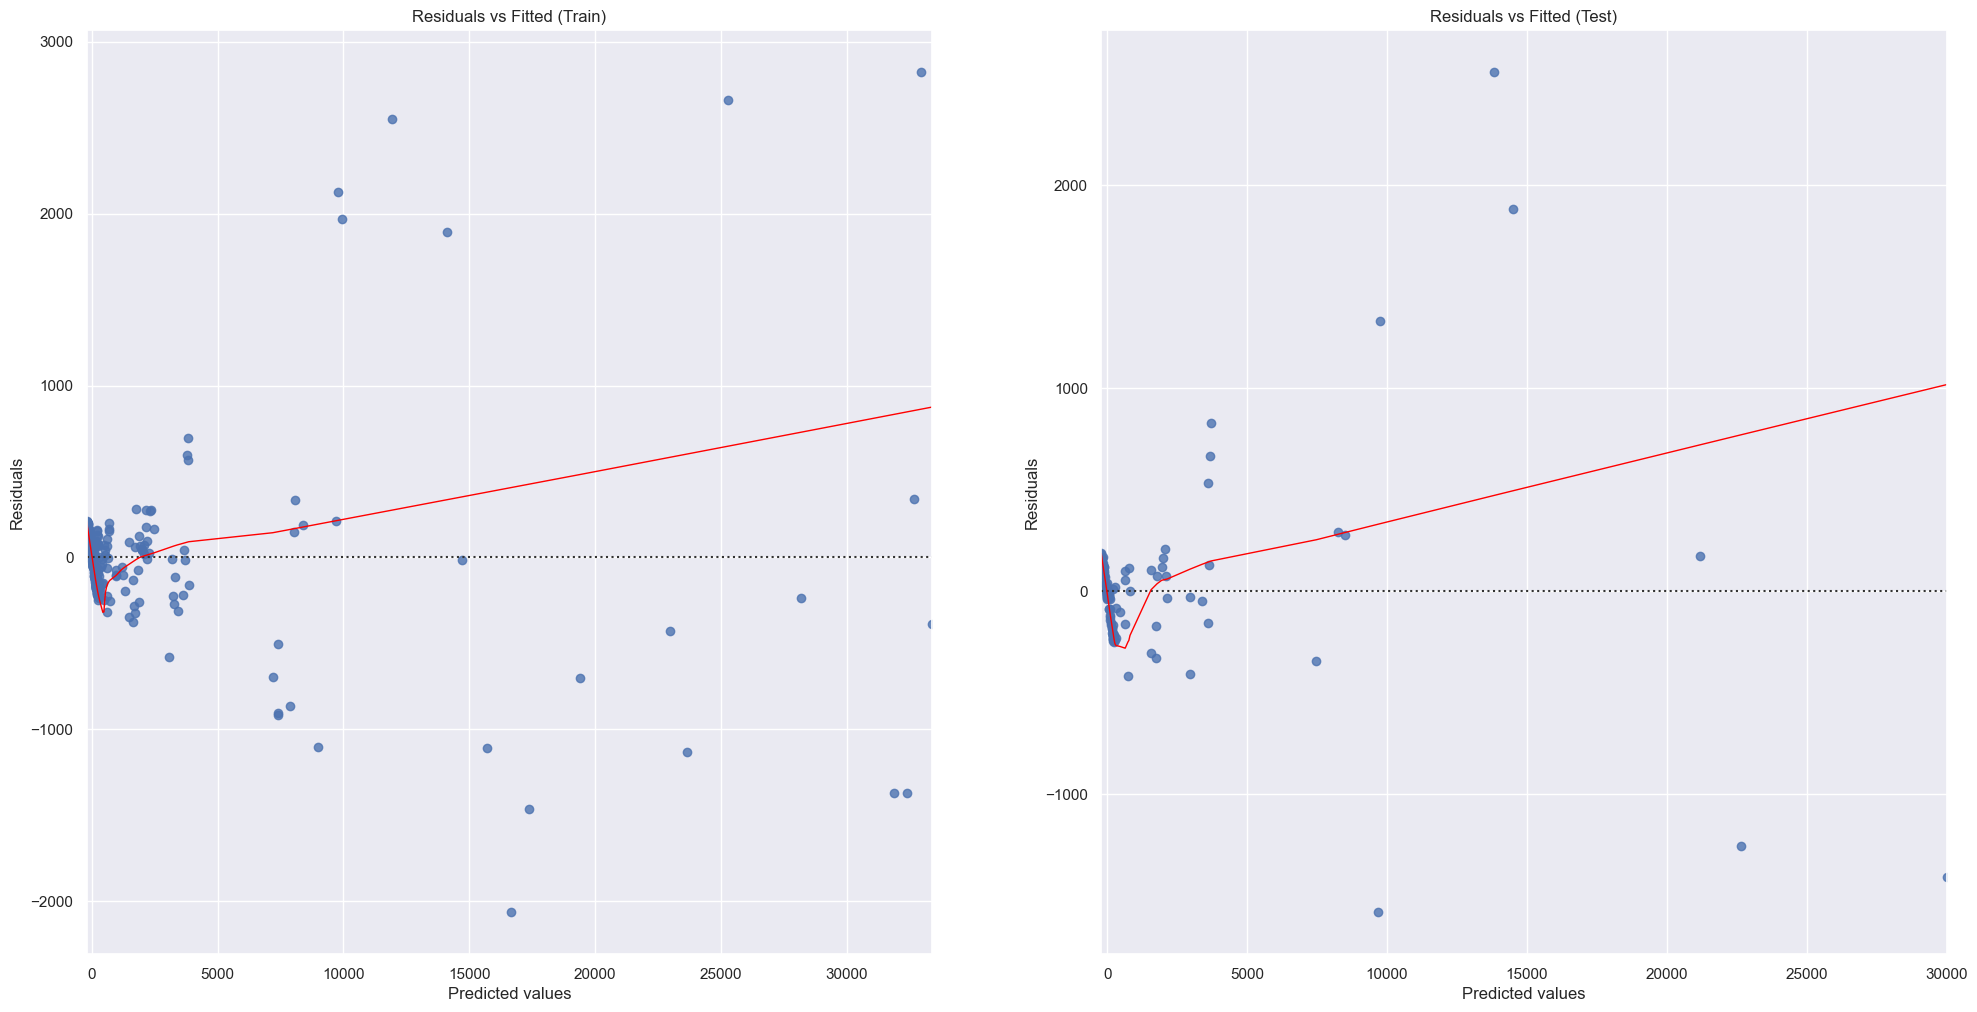

In [33]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, ax = plt.subplots(1, 2, figsize=(24, 12))
sb.residplot(x=y_train_pred, y=residuals_train, lowess=True, ax=ax[0], line_kws={'color': 'red', 'lw': 1})
ax[0].set_title('Residuals vs Fitted (Train)')
ax[0].set_xlabel('Predicted values')
ax[0].set_ylabel('Residuals')

sb.residplot(x=y_test_pred, y=residuals_test, lowess=True, ax=ax[1], line_kws={'color': 'red', 'lw': 1})
ax[1].set_title('Residuals vs Fitted (Test)')
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
plt.show()


### As seen above, the residual plot for both train and test shows a cluster of points around the horizontal axis which suggests that the relationship between the independent variables and the dependent variable is not really linear and not really adequately captured by the model.

### There isn't a consistent spread of points along the horizontal axis for the train and test dataset, which could indicate heteroscedasticity, thus the variance of the residuals varies slightly across all levels of the independent variables for both datasets.

### There are some curves and bends in the residual plot for both train and test datasets, which may suggest nonlinearity in the relationship between the dependent and independent variables. This could indicate that a more complex (nonlinear) model might be more appropriate.

## In order to ensure consistency in currency, we plan to predict the Local Price of a Big Mac in USD. Thus, we would build another multi-variate linear regression model using PPP, Exchange Rate, the various Years and Countries as the predictors and Local Price in USD as the Reponse variable¬∂

### Set target variables first PPP, Exchange Rate, the various Years and Countries as the x value and Local Price in USD as the y value

In [34]:
y = final_df['Local Price in USD']
X = final_df.drop(['Year', 'Country', 'Local Price', 'Local Price in USD'], axis=1)

#### Set up the regression problem with Train and Test datasets with a 80:20 random split.¬∂

In [35]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the sample sizes
print("Training set size - X_train:", len(X_train))
print("Training set size - y_train:", len(y_train))
print("Testing set size - X_test:", len(X_test))
print("Testing set size - y_test:", len(y_test))

Training set size - X_train: 465
Training set size - y_train: 465
Testing set size - X_test: 117
Testing set size - y_test: 117


#### Perform basic statistical exploration and visualization on the Train Set

In [36]:
# Summary Statistics for Response
y_train.describe()

count    465.000000
mean       3.315359
std        1.406294
min        0.639966
25%        2.320230
50%        3.017383
75%        4.115034
max        8.311708
Name: Local Price in USD, dtype: float64

In [37]:
# Summary Statistics for Predictors
X_train.describe()

Exchange Rate    PPP Value
count     465.000000   465.000000
mean      520.969266   196.495034
std      2038.764271   662.662482
min         0.501040     0.410000
25%         1.710000     1.441000
50%         6.696500     5.296000
75%        44.400000    18.444000
max     14090.000000  4760.509000

### Create the Linear Regression model

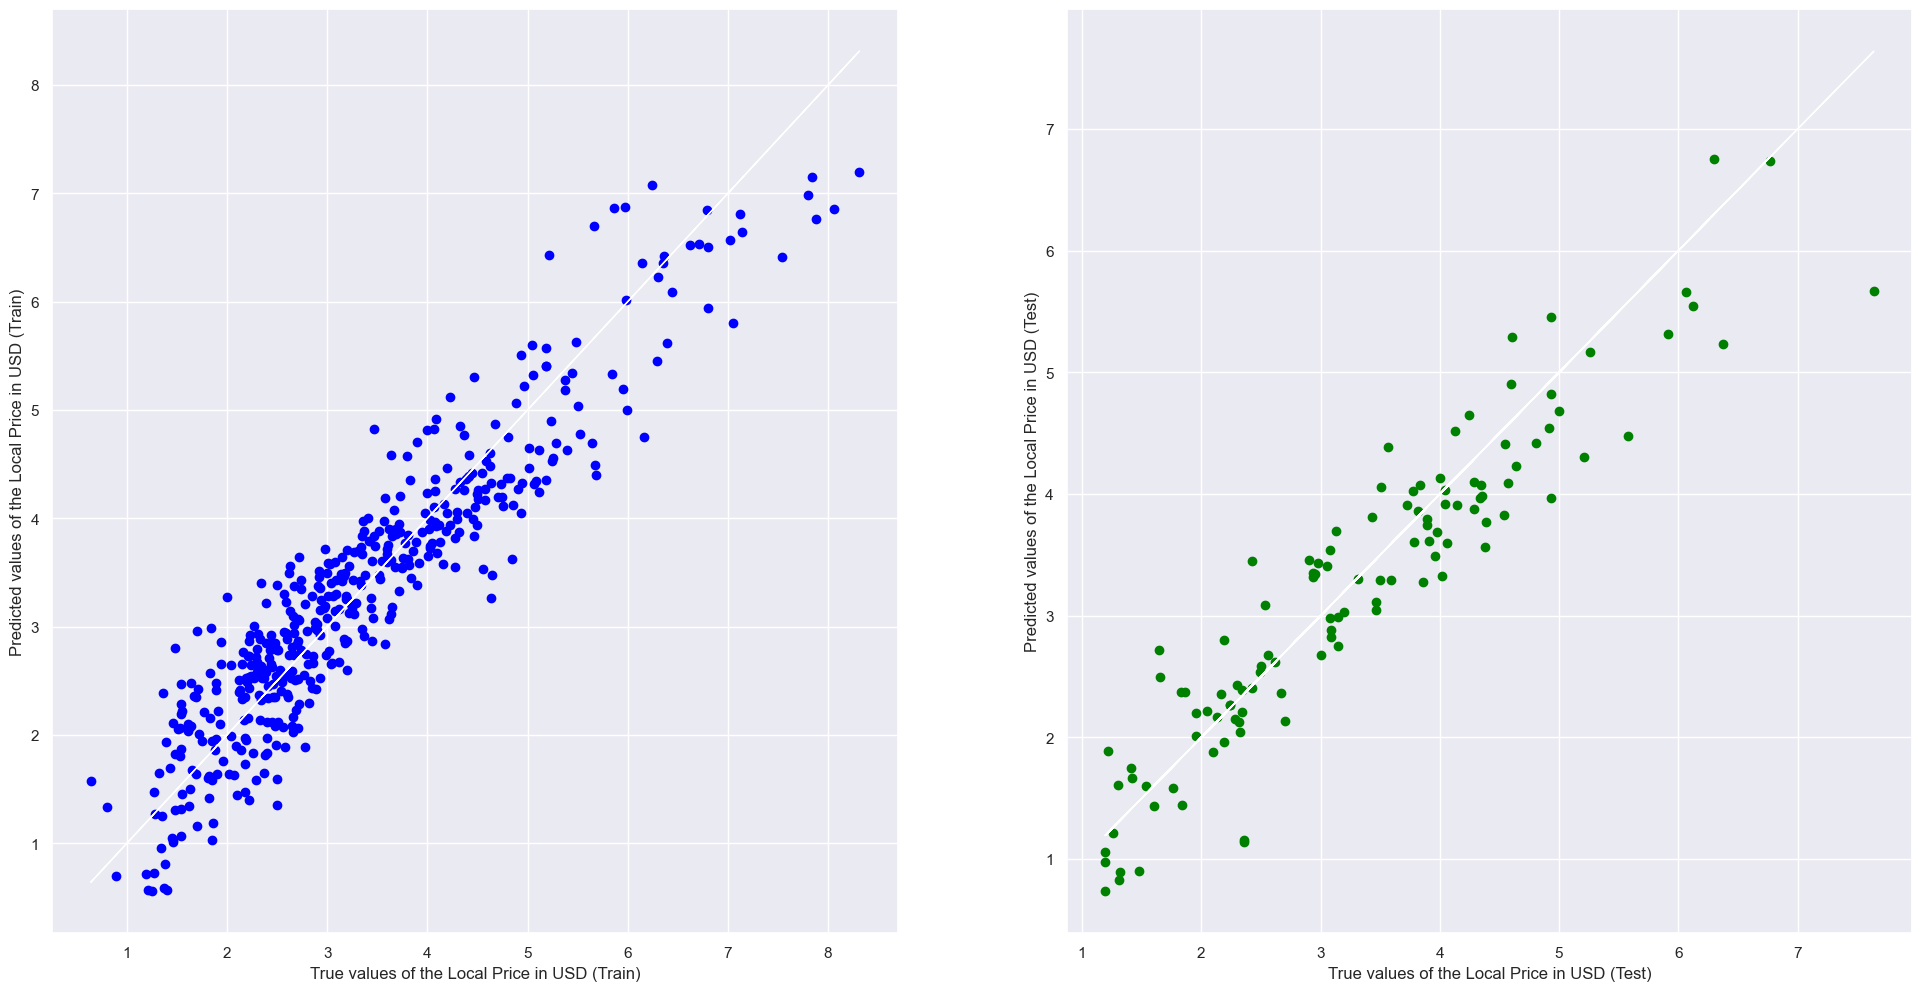

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8708679865373523
Mean Squared Error (MSE) 	: 0.25483029935840307
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8696769360299224
Mean Squared Error (MSE) 	: 0.24318931382299755


In [38]:
# Linear Regression using Train Data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plotting the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)  # Plotting the ideal line
axes[0].set_xlabel("True values of the Local Price in USD (Train)")
axes[0].set_ylabel("Predicted values of the Local Price in USD (Train)")
axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)  # Plotting the ideal line
axes[1].set_xlabel("True values of the Local Price in USD (Test)")
axes[1].set_ylabel("Predicted values of the Local Price in USD (Test)")
plt.show()

# Evaluating the Goodness of Fit
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

### From the above model, we can see that the R^2 and MSE are both sufficiently good for both train and test datasets.

### We will use a residual plot to assess the goodness-of-fit of the regression model

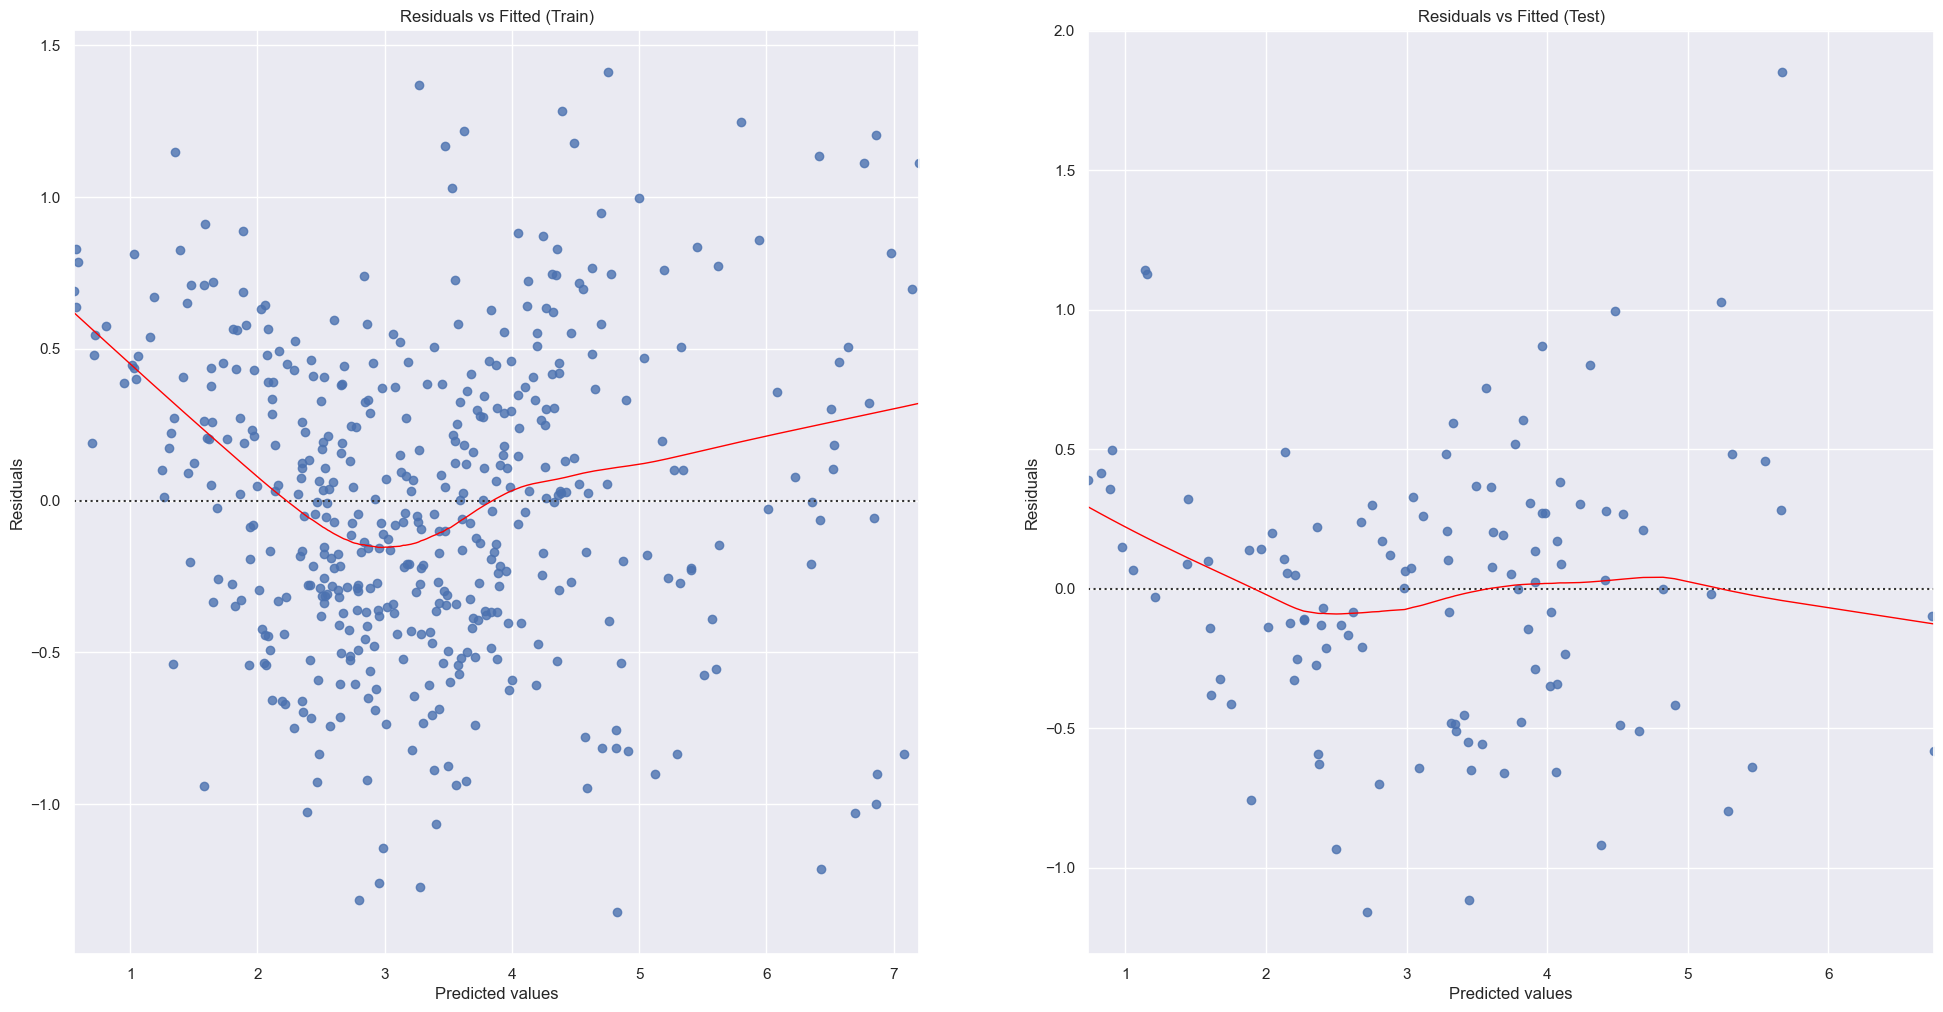

In [39]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, ax = plt.subplots(1, 2, figsize=(24, 12))
sb.residplot(x=y_train_pred, y=residuals_train, lowess=True, ax=ax[0], line_kws={'color': 'red', 'lw': 1})
ax[0].set_title('Residuals vs Fitted (Train)')
ax[0].set_xlabel('Predicted values')
ax[0].set_ylabel('Residuals')

sb.residplot(x=y_test_pred, y=residuals_test, lowess=True, ax=ax[1], line_kws={'color': 'red', 'lw': 1})
ax[1].set_title('Residuals vs Fitted (Test)')
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
plt.show()

### As seen above, the residual plot for both train and test shows a random scatter of points around the horizontal axis with no obvious pattern which suggests that the relationship between the independent variables and the dependent variable is linear and adequately captured by the model.

### There isn't a consistent spread of points along the horizontal axis for the train dataset, which could indicate heteroscedasticity, thus the variance of the residuals varies slightly across all levels of the independent variables for the train dataset. For the test dataset however, there is homoscedasticity, which indicates that the variance of the residuals is constant across all levels of the independent variables. 

### There are some curves and bends in the residual plot for both train and test datasets, which may suggest nonlinearity in the relationship between the dependent and independent variables. This could indicate that a more complex (nonlinear) model might be more appropriate.

## Prediction of Big Mac Local Price in USD Using a Regression Model
### Once we have trained a Multi-Variate Regression Model, we may use it to predict Local Price of a Big Mac in USD


In [45]:
def predict_big_mac_price(cleaned_df, country, future_year):
    # Filter the data for the specified country
    country_df = cleaned_df[cleaned_df['Country'] == country].copy()

    # Filter data to include only the ten years leading up to the given year
    start_year = future_year - 10
    country_df = country_df[(country_df['Year'] >= start_year) & (country_df['Year'] < future_year)]

    # Check if there's enough data to compute a 10-year rolling average
    if not country_df.empty:
        # Calculate 10-year moving averages for 'Exchange Rate' and 'PPP Value'
        country_df['Exchange Rate 10Y MA'] = country_df['Exchange Rate'].rolling(window=10, min_periods=1).mean()
        country_df['PPP Value 10Y MA'] = country_df['PPP Value'].rolling(window=10, min_periods=1).mean()

        # Use the last row to simulate the projection for the future year
        latest_data = country_df.iloc[-1]
        projected_features = {'Exchange Rate 10Y MA': [latest_data['Exchange Rate 10Y MA']], 
                              'PPP Value 10Y MA': [latest_data['PPP Value 10Y MA']]}

        # Create DataFrame for prediction
        future_df = pd.DataFrame(projected_features)

        # Train a linear regression model
        X = country_df[['Exchange Rate 10Y MA', 'PPP Value 10Y MA']]
        y = country_df['Local Price in USD']
        model = LinearRegression()
        model.fit(X, y)

        # Predicting the price for the specified future year
        predicted_price = model.predict(future_df)[0]

        # Evaluation
        mse = mean_squared_error(y, model.predict(X))  # Using all available data as training
        r2 = model.score(X, y)

        print(f"MSE: {mse}, R^2 Score: {r2}")
        print(f"Predicted Local Price in USD for a Big Mac in {country} in {future_year}: ${predicted_price:.2f}")
    else:
        print("Not enough data from the past ten years to calculate a 10-year rolling average for accurate prediction.")

# Example usage
predict_big_mac_price(cleaned_df, 'United States', 2023)


MSE: 0.180796404202984, R^2 Score: 0.0
Predicted Local Price in USD for a Big Mac in United States in 2023: $5.04


### For example in the above, we were able to predict the Local Price in USD for a Big Mac in the US in 2023 using the variables in the 2nd model quite accurately[1]. The function above uses the PPP and Exchange Rate values from the past 10 years of the input year to make this prediction.

#### [1] Refer to https://www.economist.com/big-mac-index to find out the prices of Big Macs around the world for different time periods

## We were able to accurately model the local price of a Big Mac using the year, country, PPP and exchange rate values and accurately predict the local price of a Big Mac in USD in the future using these variables as well. 

## For improvements, we could prehaps consider using a non-linear model such as random forest or K-Nearest Neighbors (KNN) or even time-series analysis to model the relationship between local price and PPP, exchange rate, year and country. 

## We could also analyse other variables that could affect the local price of a Big Mac such as unemployment levels and overall economic growth of a country.